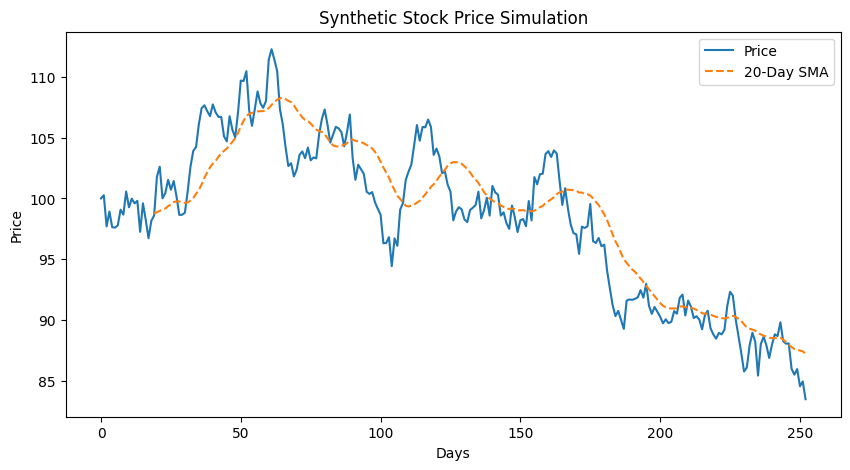

Loading Falcon model. This may take a few minutes...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Synthetic News Headlines and Falcon-based Sentiment Scores:
                                            Headline  Sentiment
0  Investors are bullish on BetaCorp following re...          1
1  Analysts are concerned about AlphaTech's decli...          1
2  Market sentiment for Gamma Inc remains neutral...          1
3  Analysts are concerned about BetaCorp's declin...          1
4  Market sentiment for AlphaTech remains neutral...          1
5  Company Delta Systems reported a strong quarte...          1
6  Investors are bullish on BetaCorp following re...          1
7  Market sentiment for BetaCorp remains neutral ...          1
8  Market sentiment for Delta Systems remains neu...          1
9  Analysts are concerned about AlphaTech's decli...          1

Synthetic Investor Profiles:
   InvestorID  Age RiskTolerance InvestmentHorizon
0           1   30          High             Short
1           2   44          High             Short
2           3   39           Low            Medium
3 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Let's generate synthetic data leveraging Brownian motion
def generate_synthetic_stock_prices(S0, mu, sigma, days):
    """
    Generate synthetic stock prices using Geometric Brownian Motion.

    Parameters:
      - S0: Initial stock price.
      - mu: Expected return (annualized).
      - sigma: Volatility (annualized).
      - days: Number of trading days to simulate.

    Returns:
      - List of simulated stock prices.
    """
    # daily time increment (252 trading days per year)
    dt = 1 / 252
    prices = [S0]
    for _ in range(days):
        drift = (mu - 0.5 * sigma ** 2) * dt
        shock = sigma * np.sqrt(dt) * np.random.normal()
        price = prices[-1] * np.exp(drift + shock)
        prices.append(price)
    return prices

# Generate one year of synthetic stock prices
# Initial stock price
S0 = 100
# 10% annual return
mu = 0.1
# 20% annual volatility
sigma = 0.2
# One trading year
days = 252

prices = generate_synthetic_stock_prices(S0, mu, sigma, days)
df_prices = pd.DataFrame({'Day': range(len(prices)), 'Price': prices})
# Computing a simple moving average (SMA) as a basic technical indicator
df_prices['SMA_20'] = df_prices['Price'].rolling(window=20).mean()

# Let's plot the synthetic stock prices and SMA
plt.figure(figsize=(10, 5))
plt.plot(df_prices['Day'], df_prices['Price'], label='Price')
plt.plot(df_prices['Day'], df_prices['SMA_20'], label='20-Day SMA', linestyle='--')
plt.title("Synthetic Stock Price Simulation")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

def generate_synthetic_news(num_samples):
    """
    Generate synthetic news headlines using pre-defined templates.

    Parameters:
      - num_samples: Number of headlines to generate.

    Returns:
      - List of synthetic news headlines.
    """
    templates = [
        "Company {company} reported a strong quarterly performance, exceeding expectations.",
        "Analysts are concerned about {company}'s declining revenue and increased debt.",
        "Market sentiment for {company} remains neutral amid industry challenges.",
        "Investors are bullish on {company} following recent positive earnings."
    ]
    companies = ["AlphaTech", "BetaCorp", "Gamma Inc", "Delta Systems"]

    news_samples = [random.choice(templates).format(company=random.choice(companies))
                    for _ in range(num_samples)]
    return news_samples

news_headlines = generate_synthetic_news(10)
df_news = pd.DataFrame({'Headline': news_headlines})

# Let's integrating Falcon LLM for Sentiment Analysis



def analyze_sentiment_falcon(headline, max_new_tokens=50):
    """
    Use Falcon LLM to analyze the sentiment of a financial news headline.
    The model is prompted to respond with one word: Positive, Negative, or Neutral.

    Parameters:
      - headline: A string containing the news headline.
      - max_new_tokens: Maximum tokens to generate.

    Returns:
      - 1 for Positive, -1 for Negative, 0 for Neutral.
    """


    # Checking for sentiment keywords in the result
    if "Positive" in result:
        return 1
    elif "Negative" in result:
        return -1
    elif "Neutral" in result:
        return 0
    else:
        # In the case if unable to determine, return neutral sentiment as default
        return 0

# Apply LLM-based sentiment analysis to each headline
df_news['Sentiment'] = df_news['Headline'].apply(analyze_sentiment_falcon)
print("Synthetic News Headlines and Falcon-based Sentiment Scores:")
print(df_news)

# Let's define the synthetic Investor Profile Data

def generate_investor_profiles(num_profiles):
    """
    Generate synthetic investor profiles with basic demographics and risk preferences.

    Parameters:
      - num_profiles: Number of investor profiles to generate.

    Returns:
      - A DataFrame with synthetic investor data.
    """
    data = {
        'InvestorID': np.arange(1, num_profiles + 1),
        'Age': np.random.randint(25, 65, num_profiles),
        'RiskTolerance': np.random.choice(['Low', 'Medium', 'High'], num_profiles),
        'InvestmentHorizon': np.random.choice(['Short', 'Medium', 'Long'], num_profiles)
    }
    return pd.DataFrame(data)

# Let's generate synthetic investor profiles
df_investors = generate_investor_profiles(5)
print("\nSynthetic Investor Profiles:")
print(df_investors)

def investment_recommendation(investor, avg_sentiment, current_trend):
    """
    Generate a simple investment recommendation based on the investor's risk tolerance,
    the average news sentiment, and the current market trend.

    Parameters:
      - investor: A row from the investor DataFrame.
      - avg_sentiment: Average sentiment score from news headlines.
      - current_trend: 'Buy' if price above SMA, else 'Sell'

    Returns:
      - A recommendation string.
    """
    if investor['RiskTolerance'] == 'High' and avg_sentiment > 0 and current_trend == 'Buy':
        return "Aggressive Buy"
    elif investor['RiskTolerance'] == 'Low' and (avg_sentiment < 0 or current_trend == 'Sell'):
        return "Sell / Hold"
    else:
        return "Hold"

# What is the current market trend based on the last price vs. the last SMA?
if df_prices['Price'].iloc[-1] > df_prices['SMA_20'].iloc[-1]:
    current_trend = 'Buy'
else:
    current_trend = 'Sell'

# Let's calculate average sentiment from news headlines using The LLM analysis
avg_sentiment = df_news['Sentiment'].mean()

# Assigning recommendations to each investor
df_investors['Recommendation'] = df_investors.apply(
    lambda row: investment_recommendation(row, avg_sentiment, current_trend), axis=1
)

print("\nInvestor Recommendations Based on Synthetic Data and Falcon Sentiment Analysis:")
print(df_investors)
